# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Bahaa

ID: 49-0354

Tutorial: T02

---



---



---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
# shows the last 5 rows in the dataset
df.tail()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9700,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [ ]:
# first 15 rows of dataset
df.head(15)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0mi,black,gray,"kia motors america, inc",$15100,$15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13900,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0mi,white,beige,aaero sweet company,$10950,$14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0mi,gray,black,wells fargo dealer services,$26600,$20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0mi,blue,gray,"kia motors america, inc",$12900,$13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [ ]:
# general information about the dataset such as type and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
# descriptive statistics about the dataset such as the mean and standard deviation
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
# includes categorical values in the statistics of the dataset
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#if we want to inspect the data of the 15 newest car models
df.sort_values('year', ascending=False).head(15)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
1236,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h99fr139230,fl,4.4,556.0mi,—,tan,ford motor credit company,$18150,$19600,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
17873,2015,Jeep,Grand Cherokee,Limited,suv,automatic,1c4rjfbg8fc674941,pa,5.0,15041.0mi,black,black,enterprise veh exchange/rental,$34300,$34800,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)
31573,2015,Ford,Explorer,Limited,SUV,automatic,1fm5k8f82fga77914,nj,4.3,8923.0mi,blue,black,enterprise veh exchange/rental,$33400,$30500,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
1909,2015,BMW,5 Series Gran Turismo,535i,hatchback,automatic,wba5m2c54fd872063,ca,4.7,6436.0mi,gray,black,financial services remarketing (lease),$48100,$53500,Thu Jun 04 2015 05:30:00 GMT-0700 (PDT)
17861,2015,Mazda,Mazda6,i Sport,Sedan,automatic,jm1gj1u54f1180111,fl,4.3,13185.0mi,black,black,enterprise veh exchange/rental,$17800,$18200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
20306,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnskckc1fr539007,mo,4.2,21866.0mi,black,black,budget rent a car/kansas city funding llc,$53900,$50500,Tue May 26 2015 04:00:00 GMT-0700 (PDT)
15878,2015,Chevrolet,Tahoe,LTZ,SUV,automatic,1gnscckc5fr197719,fl,1.0,1.0mi,black,black,enterprise veh exchange/rental,$16500,$4100,Tue Jun 23 2015 02:30:00 GMT-0700 (PDT)
28765,2015,Kia,Sorento,LX,suv,automatic,5xyktda74fg639200,fl,4.9,14395.0mi,burgundy,black,"kia motors america, inc",$21000,$20200,Wed Jun 17 2015 02:30:00 GMT-0700 (PDT)
39605,2015,Kia,Sorento,LX,SUV,automatic,5xyktca67fg585862,wi,4.3,11281.0mi,black,black,"kia motors america, inc",$21000,$20700,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
31593,2015,BMW,4 Series,428i,convertible,automatic,wba3v5c50fp752376,oh,5.0,7334.0mi,blue,black,bmw north america greer,$49000,$48000,Tue Jun 16 2015 07:00:00 GMT-0700 (PDT)


In [ ]:
# number/ frequency of attribute instances and its data type
df['make'].value_counts()

Ford             7871
Chevrolet        5322
Nissan           4297
Toyota           3474
Dodge            2718
Honda            2403
Hyundai          1801
BMW              1680
Kia              1639
Chrysler         1566
Infiniti         1442
Mercedes-Benz    1375
Jeep             1305
Volkswagen       1038
Lexus            1024
GMC               901
Mazda             701
Cadillac          606
Audi              485
Acura             476
Buick             467
Lincoln           457
Subaru            444
Ram               397
Pontiac           377
Mitsubishi        370
MINI              289
Saturn            286
Volvo             281
Scion             159
Mercury           148
Land Rover        143
Porsche           129
Jaguar            122
Suzuki             96
HUMMER             84
FIAT               56
Saab               41
smart              36
Oldsmobile         24
Isuzu              19
Maserati           10
Bentley             8
Fisker              3
Plymouth            3
Geo       

In [ ]:
# shows amount of null values in the independent variables of the dataset
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
#filter for specific columns example
sorted_year= df.sort_values('year', ascending=False)
sorted_year[['seller','year']].head(10)

,seller,year
1236,ford motor credit company,2015
17873,enterprise veh exchange/rental,2015
31573,enterprise veh exchange/rental,2015
1909,financial services remarketing (lease),2015
17861,enterprise veh exchange/rental,2015
20306,budget rent a car/kansas city funding llc,2015
15878,enterprise veh exchange/rental,2015
28765,"kia motors america, inc",2015
39605,"kia motors america, inc",2015
31593,bmw north america greer,2015


In [ ]:
#If we want to filter the dataframe to just a certain model such as Sorento, we can use index with a boolean mask
df[df['model'] == 'Sorento']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
165,2015,Kia,Sorento,LX,suv,automatic,5xyktca62fg571707,wi,4.2,14700.0mi,silver,gray,"kia motors america, inc",$20000,$20200,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)
322,2015,Kia,Sorento,LX,SUV,automatic,5xyktca68fg551025,mn,5.0,21296.0mi,white,tan,"kia motors america, inc",$19750,$19700,Thu May 21 2015 03:30:00 GMT-0700 (PDT)
362,2012,Kia,Sorento,LX,SUV,automatic,5xyktda60cg219694,az,3.9,48203.0mi,gray,black,n-baro auction team wholesale motor vehicle,$14650,$16300,Thu Feb 19 2015 02:30:00 GMT-0800 (PST)
664,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg585166,wi,4.8,15310.0mi,silver,gray,"kia motors america, inc",$20800,$20800,Wed Jan 21 2015 02:00:00 GMT-0800 (PST)
957,2014,Kia,Sorento,LX,SUV,automatic,5xyktca63eg448139,tn,4.3,57587.0mi,gray,black,the hertz corporation,$15650,$15600,Wed Feb 25 2015 02:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45939,2015,Kia,Sorento,LX,SUV,automatic,5xyktca61fg571925,oh,5.0,10224.0mi,black,gray,"kia motors america, inc",$20900,$21200,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)
46081,2006,Kia,Sorento,LX,SUV,automatic,kndjd733065646965,sc,3.7,100617.0mi,beige,tan,rick hendrick dodge chrysler jeep ram,$4375,$5700,Tue Jan 27 2015 02:00:00 GMT-0800 (PST)
46180,2011,Kia,Sorento,Base,SUV,automatic,5xykt3a1xbg133645,il,2.5,37042.0mi,gray,gray,par north america,$12250,$10200,Thu Mar 05 2015 02:00:00 GMT-0800 (PST)
46297,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69eg446685,tx,4.4,55201.0mi,silver,silver,the hertz corporation,$14350,$14500,Thu May 28 2015 04:00:00 GMT-0700 (PDT)


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# makes first letter capital and removes capital letters in the middle of the values if any for categorical values to make the data more representable, same for the other capitalize
df['body']=df['body'].str.capitalize()
df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df['transmission']=df['transmission'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df['seller']=df['seller'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,The hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,Award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,Lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,Peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,U-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,Wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,Nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,Motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,Avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df['interior']=df['interior'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,Gray,The hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,Award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,Black,Lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,Black,Peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,Gray,U-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,Gray,Wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,Black,Nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,Beige,Motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,Beige,Avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df['color']=df['color'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,Black,Gray,The hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,Gray,—,Award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,Silver,Black,Lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,Black,Black,Peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,White,Gray,U-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,Gray,Wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,Black,Black,Nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357.0mi,White,Beige,Motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,Black,Beige,Avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# extracts only the digits to convert it into an int type to remove unwanted characters such as mi or dollar sign in the case of selling price
df['odometer']=df['odometer'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404,Black,Gray,The hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846,Gray,—,Award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122,Silver,Black,Lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303,Black,Black,Peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714,White,Gray,U-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,Gray,Wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185,Black,Black,Nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357,White,Beige,Motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376,Black,Beige,Avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# extracts only the digits to convert it into an int type to remove unwanted characters such as mi or dollar sign in the case of selling price
df['mmr']=df['mmr'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404,Black,Gray,The hertz corporation,11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846,Gray,—,Award auto sales and leasing inc,28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122,Silver,Black,Lexus financial services,22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303,Black,Black,Peddle llc,3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714,White,Gray,U-haul,22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,Gray,Wheels exchange llc,15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185,Black,Black,Nissan infiniti lt,19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357,White,Beige,Motorcars of south texas,22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376,Black,Beige,Avis rac/san leandro,13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# extracts only the digits to convert it into an int type to remove unwanted characters such as mi or dollar sign in the case of selling price
df['sellingprice']=df['sellingprice'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404,Black,Gray,The hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,Automatic,jtezu5jr2e5064567,fl,4.9,17846,Gray,—,Award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122,Silver,Black,Lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303,Black,Black,Peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714,White,Gray,U-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,Automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,Gray,Wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185,Black,Black,Nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357,White,Beige,Motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376,Black,Beige,Avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# displays unique attribute values for a certain attribute, same for interior and any other attribute
df.color.unique()

array(['Black', 'Gray', 'Silver', 'White', 'Blue', 'Burgundy', 'Beige',
       'Gold', 'Green', 'Red', 'Purple', '—', 'Yellow', 'Brown',
       'Turquoise', 'Orange', 'Off-white', 'Charcoal', 'Pink', 'Lime'],
      dtype=object)

In [ ]:
df.interior.unique()

array(['Gray', '—', 'Black', 'Beige', 'Tan', 'Red', 'Blue', 'Brown',
       'Off-white', 'Silver', 'Orange', 'Purple', 'White', 'Gold',
       'Burgundy', 'Green', 'Yellow'], dtype=object)

In [ ]:
# removes the - as one of the unique attribute values
df = df[df.color != '—']


In [ ]:
df.color.unique()

array(['Black', 'Gray', 'Silver', 'White', 'Blue', 'Burgundy', 'Beige',
       'Gold', 'Green', 'Red', 'Purple', 'Yellow', 'Brown', 'Turquoise',
       'Orange', 'Off-white', 'Charcoal', 'Pink', 'Lime'], dtype=object)

In [ ]:
# removes the - as one of the unique attribute values
df = df[df.interior != '—']

In [ ]:
df.interior.unique()

array(['Gray', 'Black', 'Beige', 'Tan', 'Red', 'Blue', 'Brown', 'Silver',
       'Orange', 'Off-white', 'Purple', 'White', 'Gold', 'Burgundy',
       'Green', 'Yellow'], dtype=object)

In [ ]:
df.body.unique()

array(['Sedan', 'Suv', 'E-series van', 'Crew cab', 'G sedan', 'Wagon',
       'Regular cab', 'Double cab', 'Coupe', 'Minivan', 'Supercrew',
       'Convertible', 'Extended cab', 'Hatchback', 'Van', 'Supercab',
       'King cab', 'Quad cab', 'G coupe', 'Crewmax cab', 'Club cab',
       'G convertible', 'Access cab', 'Genesis coupe', 'G37 convertible',
       'Beetle convertible', 'Cab plus 4', 'Promaster cargo van',
       'Mega cab', 'Koup', 'Elantra coupe', 'Regular-cab', 'Xtracab',
       'Cts coupe', 'Cts wagon', 'Granturismo convertible',
       'Tsx sport wagon', 'Cts-v coupe', 'Q60 coupe', 'Transit van'],
      dtype=object)

In [ ]:
#Captialize the first letter and remove the duplicates
df['body']=df['body'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,5npeb4acxdh702805,ma,3.9,50404,Black,Gray,The hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
2,2012,Lexus,IS 250,Base,Sedan,Automatic,jthbf5c24c5168599,fl,4.1,21122,Silver,Black,Lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,Automatic,5uxfb33562lh33864,fl,1.9,145303,Black,Black,Peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,Automatic,1ftne2ew0eda31832,wa,4.9,6714,White,Gray,U-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,Sedan,Automatic,5xxgm4a70eg329048,co,4.6,8386,Black,Gray,"Kia motors america, inc",15100,15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46572,2006,Volvo,S40,2.4i,Sedan,Automatic,yv1ms390462186357,ca,3.8,56993,Gray,Gray,Prestige auto wholesale inc,6350,7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,Automatic,jn1cv6ap9cm623162,ca,4.5,23185,Black,Black,Nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,Automatic,wba3a5c56df356614,tx,4.2,45357,White,Beige,Motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,Automatic,4t1bf1fk8du254684,ca,3.5,43376,Black,Beige,Avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df.body.unique()

array(['Sedan', 'Suv', 'E-series van', 'Crew cab', 'G sedan', 'Wagon',
       'Regular cab', 'Double cab', 'Coupe', 'Minivan', 'Supercrew',
       'Convertible', 'Extended cab', 'Hatchback', 'Van', 'Supercab',
       'King cab', 'Quad cab', 'G coupe', 'Crewmax cab', 'Club cab',
       'G convertible', 'Access cab', 'Genesis coupe', 'G37 convertible',
       'Beetle convertible', 'Cab plus 4', 'Promaster cargo van',
       'Mega cab', 'Koup', 'Elantra coupe', 'Regular-cab', 'Xtracab',
       'Cts coupe', 'Cts wagon', 'Granturismo convertible',
       'Tsx sport wagon', 'Cts-v coupe', 'Q60 coupe', 'Transit van'],
      dtype=object)

In [ ]:
# Replace G sedan with sedan
df=df.replace(to_replace="G sedan",
           value="Sedan")

In [ ]:
# Replace G coupe with coupe
df=df.replace(to_replace="G coupe",
           value="Coupe")

In [ ]:
# Replace Genesis coupe with Coupe
df=df.replace(to_replace="Genesis coupe",
           value="Coupe")

In [ ]:
# Replace Elantra coupe with Coupe
df=df.replace(to_replace="Elantra coupe",
           value="Coupe")

In [ ]:
# Replace Cts coupe with Coupe
df=df.replace(to_replace="Cts coupe",
           value="Coupe")

In [ ]:
# Replace Q60 coupe with Coupe
df=df.replace(to_replace="Q60 coupe",
           value="Coupe")

In [ ]:
df=df.replace(to_replace="Cts-v coupe",
           value="Coupe")

In [ ]:
# Replace G convertible with Convertible
df=df.replace(to_replace="G convertible",
           value="Convertible")

In [ ]:
# Replace Beetle convertible with Convertible
df=df.replace(to_replace="Beetle convertible",
           value="Convertible")

In [ ]:
# Replace G37 convertible with Convertible
df=df.replace(to_replace="G37 convertible",
           value="Convertible")

In [ ]:
# Replace Q60 convertible with Convertible
df=df.replace(to_replace="Q60 convertible",
           value="Convertible")

In [ ]:
# Replace Granturismo convertible with Convertible
df=df.replace(to_replace="Granturismo convertible",
           value="Convertible")

In [ ]:
# Replace CTS wagon with Wagon
df=df.replace(to_replace="Cts wagon",
           value="Wagon")

In [ ]:
# Replace Tsx sport wagon with Wagon
df=df.replace(to_replace="Tsx sport wagon",
           value="Wagon")

In [ ]:
# replace crew cab with pickuptruck
df=df.replace(to_replace="Crew cab",
           value="Pickup Truck")

In [ ]:
# replace regular-cab with pickuptruck
df=df.replace(to_replace="Regular-cab",
           value="Pickup Truck")

In [ ]:
# replace crew cab with pickuptruck
df=df.replace(to_replace="Regular cab",
           value="Pickup Truck")

In [ ]:
# replace double cab with pickuptruck
df=df.replace(to_replace="Double cab",
           value="Pickup Truck")

In [ ]:
# replace extended cab with pickuptruck
df=df.replace(to_replace="Extended cab",
           value="Pickup Truck")

In [ ]:
# replace supercab with pickuptruck
df=df.replace(to_replace="Supercab",
           value="Pickup Truck")

In [ ]:
# replace king cab with pickuptruck
df=df.replace(to_replace="King cab",
           value="Pickup Truck")

In [ ]:
# replace quad cab with pickuptruck
df=df.replace(to_replace="Quad cab",
           value="Pickup Truck")

In [ ]:
# replace supercab cab with pickuptruck
df=df.replace(to_replace="Supercab",
           value="Pickup Truck")

In [ ]:
# replace crewmaxcab with pickuptruck
df=df.replace(to_replace="Crewmax cab",
           value="Pickup Truck")

In [ ]:
# replace club cab with pickuptruck
df=df.replace(to_replace="Club cab",
           value="Pickup Truck")

In [ ]:
# replace access cab with pickuptruck
df=df.replace(to_replace="Access cab",
           value="Pickup Truck")

In [ ]:
# replace cab plus 4 with pickuptruck
df=df.replace(to_replace="Cab plus 4",
           value="Pickup Truck")

In [ ]:
# replace mega cab with pickuptruck
df=df.replace(to_replace="Mega cab",
           value="Pickup Truck")

In [ ]:
# Replace Xtracab with Pickup Truck
df=df.replace(to_replace="Xtracab",
           value="Pickup Truck")

In [ ]:
# replace e-series van with minivan
df=df.replace(to_replace="E-series van",
           value="Minivan")

In [ ]:
# replace van with minivan
df=df.replace(to_replace="Van",
           value="Minivan")

In [ ]:
# replace promaster cargo van with minivan
df=df.replace(to_replace="Promaster cargo van",
           value="Minivan")

In [ ]:
# replace transit van with minivan
df=df.replace(to_replace="Transit van",
           value="Minivan")

In [ ]:
# removing supercrew from the body
df = df[df.body != 'Supercrew']

In [ ]:
# Removing Koup from the body
df = df[df.body != 'Koup']

In [ ]:
df.body.unique()

array(['Sedan', 'Suv', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

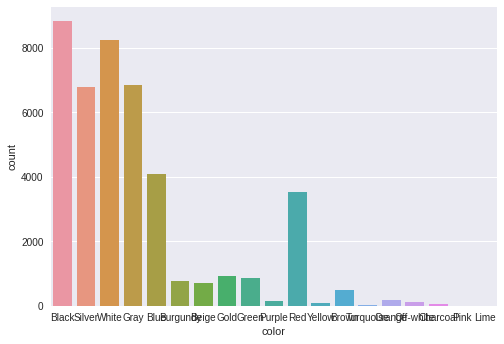

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

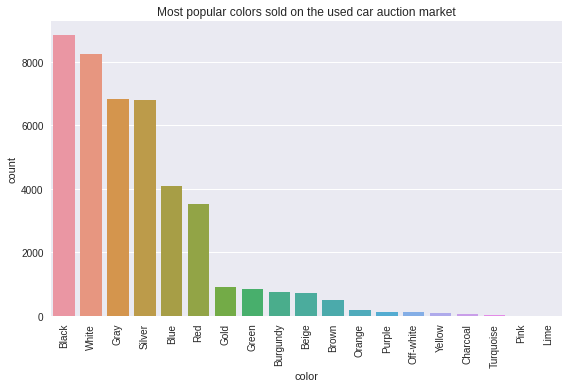

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

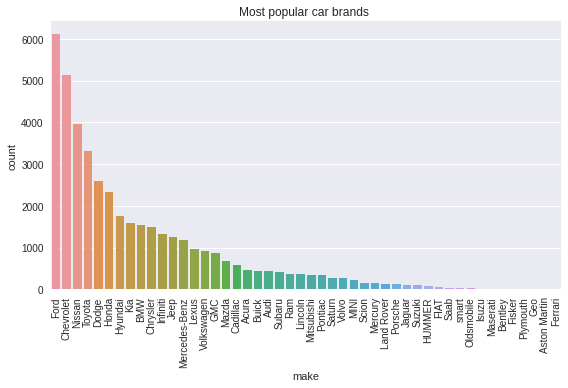

In [ ]:
# plot sorted in descending order, rotated x-axis labels for clarity, and a plot title. relating car brand with selling price
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands ')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular car rand is Ford due to having the highest frequency as shown in the bar chart (having nearly 6000 as a frequency). it is followed by Chevrolet having roughly 5100 as a frequency and in third place comes Nissan having about 4000 as a frequency.


**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

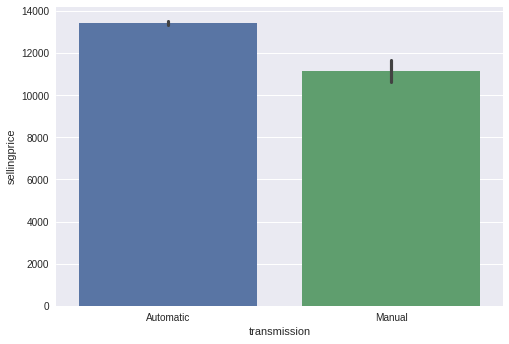

In [ ]:
# bar plot that visualizes the transmission type with the average selling price
sns.barplot(data=df, x="transmission", y="sellingprice")

**Answer for Q2**: Yes, automatic car transmission type sells higher on average than the manual type as shown in the bar chart the automatic type has a selling price that is roughly 14,000 dollars while the manual type has about 11,000 dollars. On average, the automatic type is higher than the manual type by 3000 dollars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 48 Text major ticklabel objects>)

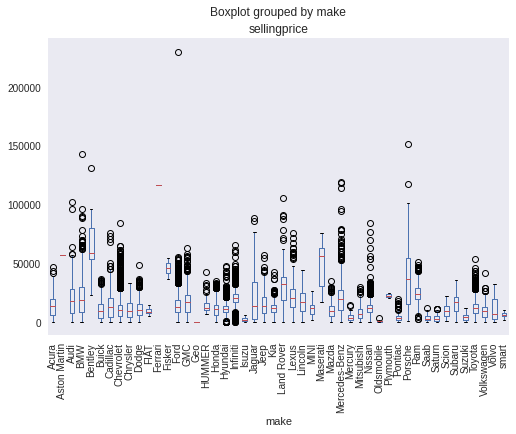

In [ ]:
# box plot showing the distribution of the selling prices of each car make 
df.boxplot(by ='make', column =['sellingprice'], grid = False)
plt.xticks(rotation=90)

**Answer for Q3**: for the widest distribution, Porchse and jaguar.
for the most expensive, porchse and bentley.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


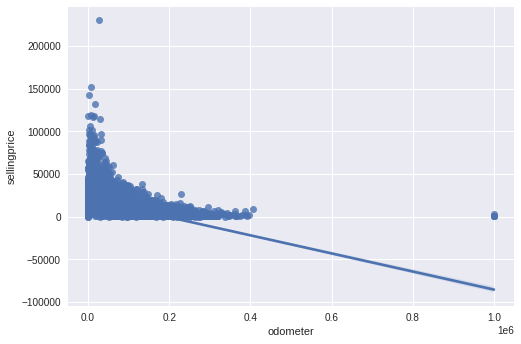

In [ ]:
# Scatter plot with the best fit line
sns.regplot(df['odometer'],df['sellingprice'])

**Answer for Q4**: the odometer and the selling price have a strong negative correlation as shown in the graph

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


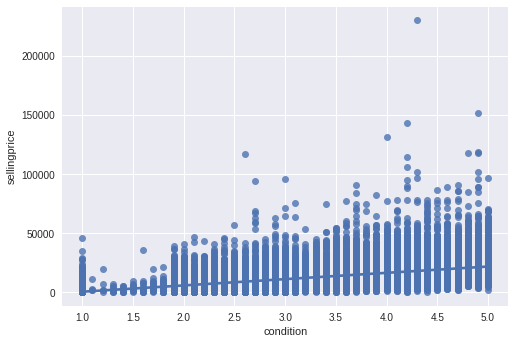

In [ ]:
# Scatter plot with the bestfit line
sns.regplot(df['condition'],df['sellingprice'])

**Answer for Q5**: they have a weak positive correlation

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

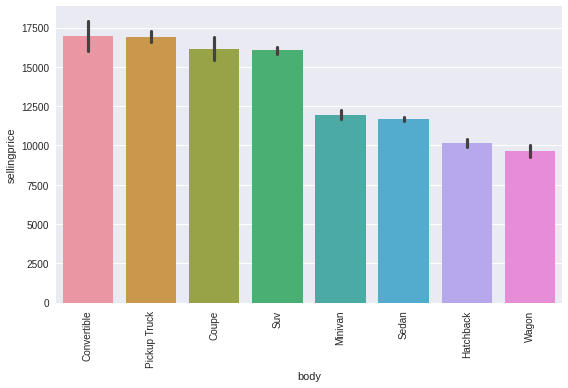

In [ ]:
# bar plot sorted ascendingly to visualize the selling price according to the body type
large_to_small = df[['sellingprice','body']].groupby('body').mean().sort_values('sellingprice',ascending=False).index
sns.barplot(x='body', y='sellingprice', data=df, order=large_to_small)
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q6**: the most expensive body type is convertible as shown in the graph has a selling price of about 17500. the least expensive is the wagon type as it has a selling price of less than 10000. we believe that the average car price does not differ according to body type as the first half of body types are selling at about the same selling price above 15000 and the other half below 12500 and all of them fall in the same range and do not differ immensely from each other.


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
# we chose those independent variables as they have a strong correlation with the dependent variable and will have a significant effect on it. also, the independent variables themselves are not related to each other.
# we didn't choose other independent variables such as trim, salesdate and seller as they have no significant correlation with the indepenedent variable(selling price), the trim is highly correlated with the model independent variable that we choose hence we didn't choose it. The salesdate as well as the seller have a very weak correlation with the selling price compared to the year independent variable for example that has a strong corellation in terms of time
df_new=df.loc[:,['body','make', 'odometer', 'transmission', 'year','condition', 'sellingprice']]
df_new

,body,make,odometer,transmission,year,condition,sellingprice
0,Sedan,Hyundai,50404,Automatic,2013,3.9,10900
2,Sedan,Lexus,21122,Automatic,2012,4.1,24200
3,Suv,BMW,145303,Automatic,2002,1.9,3200
4,Minivan,Ford,6714,Automatic,2014,4.9,22100
5,Sedan,Kia,8386,Automatic,2014,4.6,15500
...,...,...,...,...,...,...,...
46572,Sedan,Volvo,56993,Automatic,2006,3.8,7000
46574,Sedan,Infiniti,23185,Automatic,2012,4.5,21500
46575,Sedan,BMW,45357,Automatic,2013,4.2,22000
46576,Sedan,Toyota,43376,Automatic,2013,3.5,13800


In [ ]:
# one-hot encoding to convert categorical values into binary vectors to be able to use them in the regression model
categorical_columns = [ 'body','make','transmission', 'condition']
df_encode = pd.get_dummies(data=df_new,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


In [ ]:
# Training
#dependetvariable is selling price , independent variable is odometer
from sklearn.model_selection import train_test_split
x=df_encode.drop('sellingprice', axis=1)
y=df_encode['sellingprice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 34140
Testing dataset size: 8536


## Modelling

_Apply the linear regression model below._

In [ ]:
# applying linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation using r squared and rmse
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5501.212734733282
R^2 obtained is: 0.6745449003983686


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

R Squared represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. In other words, it is a statistical measure of how close the true values are to the fitted regression line. A score of 0 indicates that the model explains none of the variability of the response data around its mean. A score of 1.0 (best possible score) indicates that the model explains all of the variability of the response data around its mean. the r squared value of 0.67 that our model indicates that the model explains 67% of the variation in the dependent variable that has been explained by the dependent variables. this value is more than 50% making it effective and is not really close to 1 so it is both effective and efficient.

The Root Mean Squared Error (RMSE) compare the predicted value with the actual/true value in the test set. This allows us to compare the average deviation in the same units as the response variable. the value of RMSE of our model 5529 shows that the dependent variable deviates by 5529 from the predicted value (regression model). which is in parallel with the 67% of the r squared evaluation method making it an effective model


## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:  the r squared value of 0.67 that our model indicates that the model explains 67% of the variation in the dependent variable that has been explained by the dependent variables. this value is more than 50% making it effective and is not really close to 1 so it is both effective and efficient.
 the value of RMSE of our model 5529 shows that the dependent variable deviates by 5529 from the predicted value (regression model). which is in parallel with the 67% of the r squared evaluation method making it an effective model. we believe the model is moderatley accurate and acceptable as it is not very close to 1 making it overfitting as well as being more than 0.5 which is the mid or 50%. this is alligned with the RMSE value. A problem could be that the model could be more accurate to about 0.8 by increasing data cleaning further than what was required to make it more reliable. However, this value is an acceptable one Therefore, We would recommend this model for used car dealerships that want to get a reliable estimate for car problems
